### Introduction

An E-Scommerce company based in New York City sells clothing online but it also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on improving their mobile app experience or their website. 

**Importing the necessary libraries**

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [227]:
# reading in the data
df=pd.read_csv('C:\\Users\\aabha.DESKTOP-HG6KK17\\Downloads\\Py-DS-ML-Bootcamp-master\\Refactored_Py_DS_ML_Bootcamp-master\\11-Linear-Regression\\Ecommerce Customers')

**Visually assessing the data**

In [228]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


**Programatically assessing the data**

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


- There are no missing values
- The datatypes seem to be correct

In [230]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


- The distribution of values looks okay. 
- No outliers

In [231]:
df['Avatar'].nunique()

138

**For linear regression model, we can only use the numerical variables.**
- The categorical variables like Email, Address and Avatar have too many unique values. Hence creating dummy variables in order to use them in linear regression model does not seem plausible and feasible.**

In [232]:
# Changing the variable names for lowercase labels
df.rename(columns = lambda x:x.lower(), inplace=True)
df.head()

,email,address,avatar,avg. session length,time on app,time on website,length of membership,yearly amount spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [233]:
# Renaming columns to remove spaces 
df= df.rename(columns= {'time on app':'time_on_app', 'time on website':'time_on_website', 'length of membership':'length_of_membership','yearly amount spent':'yearly_amount_spent'})
df=df.rename(columns = {'avg. session length':'avg_session_length'})

In [234]:
# Confirming the change in variable names
df.head(1)

,email,address,avatar,avg_session_length,time_on_app,time_on_website,length_of_membership,yearly_amount_spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054


### Exploratory Data Analysis

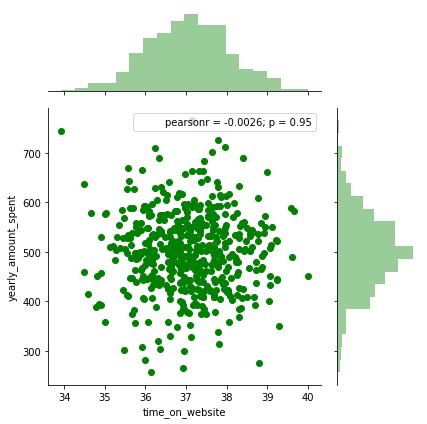

In [235]:
sns.jointplot(data=df, x='time_on_website', y='yearly_amount_spent', color='g', ratio=3);

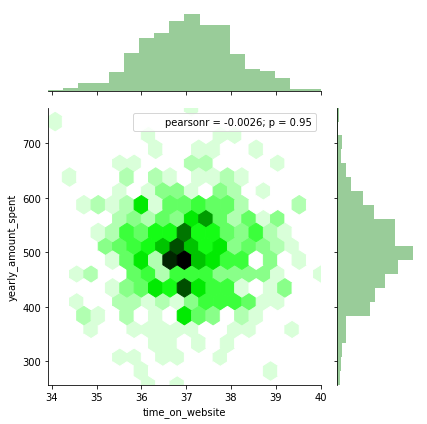

In [236]:
g = sns.jointplot(data=df, x='time_on_website', y='yearly_amount_spent', color='g', kind="hex", ratio=3)

- There doesn't appear to be any clear trend between time_on_website and yearly_amount_spent

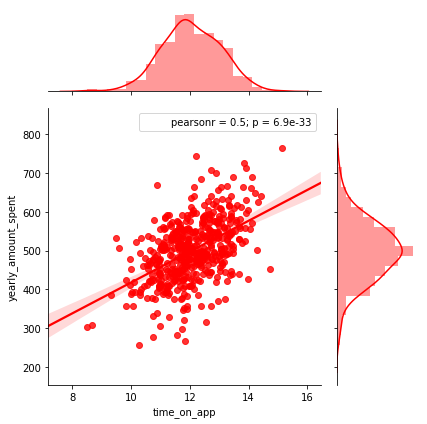

In [237]:
sns.jointplot(data=df, x='time_on_app', y='yearly_amount_spent', color='r', kind='reg', ratio=3);

- There is little more correlation between time_on_app and yearly_amount_spent

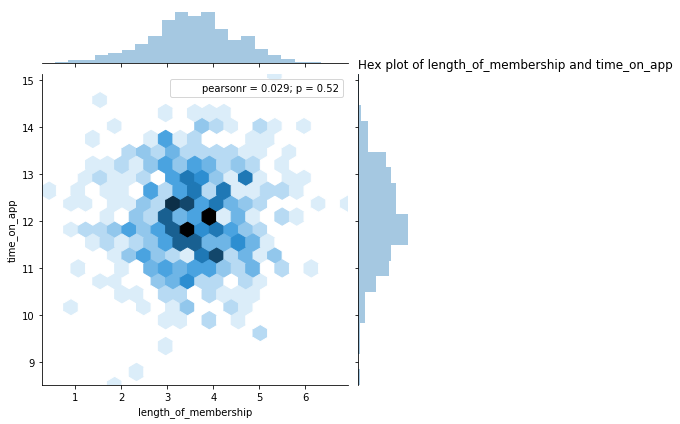

In [238]:
sns.jointplot(x='length_of_membership',y='time_on_app',kind='hex',data=df)
plt.title('Hex plot of length_of_membership and time_on_app', loc='left');

#### Let's explore these types of relationships across the entire data set using pairplot

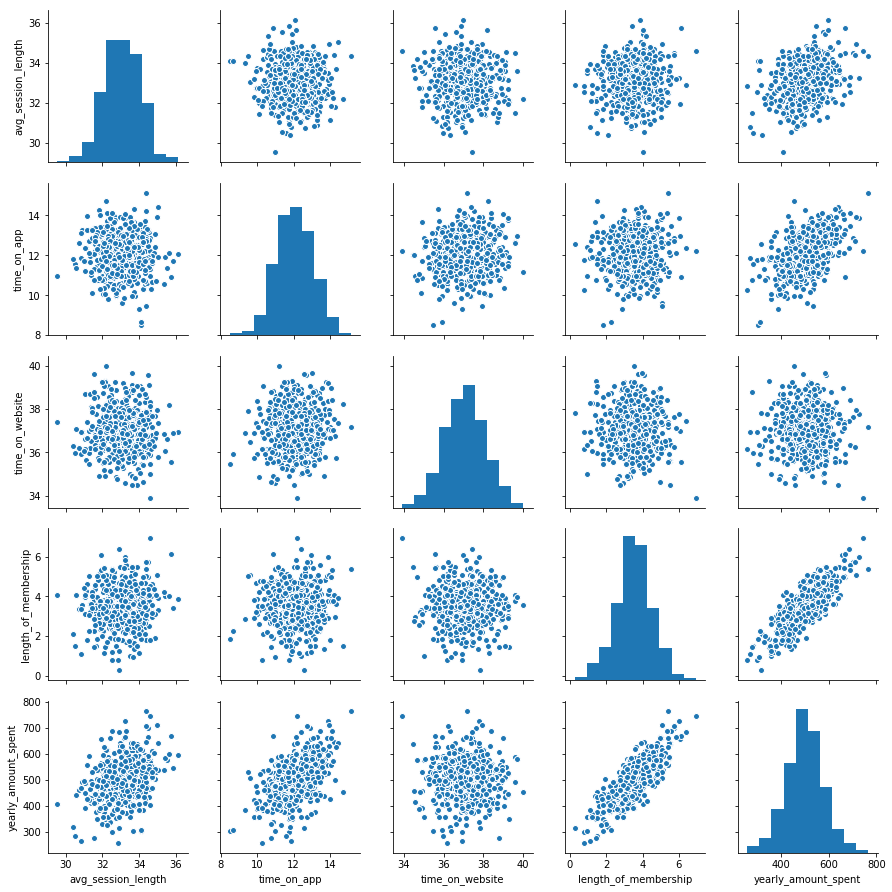

In [239]:
sns.pairplot(data=df);

- Based on the visual assessment of pairplots, length_of_membership has a direct positive correlation with yearly_amount_spent

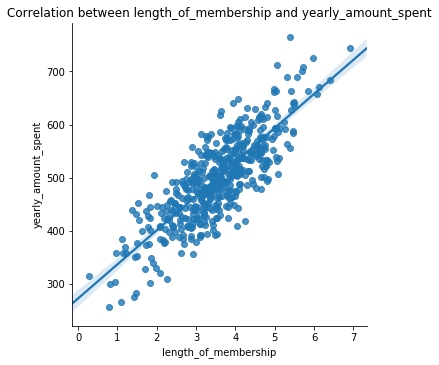

In [240]:
sns.lmplot(data=df, x='length_of_membership', y='yearly_amount_spent')
plt.title('Correlation between length_of_membership and yearly_amount_spent');

- So the longer the length_of_membership, the higher the yearly_amount_spent, which is quite logical

### Splitting the dataset between training and testing data

 Set a variable X equal to the numerical features of the dataset and a variable y equal to the "yearly_amount_spent" column.

In [241]:
X=df[['avg_session_length', 'time_on_app', 'time_on_website', 'length_of_membership']]
y=df['yearly_amount_spent']

Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101

70% of data for train and 30% of data for test

In [242]:
from sklearn.model_selection import train_test_split

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Training the Model

In [244]:
from sklearn.linear_model import LinearRegression

Create an instance of a LinearRegression() model named lm.

In [245]:
lm=LinearRegression()

Train/fit lm on the training data.

In [246]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Print out the coefficients of the model

In [247]:
print('Coefficients: \n', lm.coef_)

coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['Coefficient']
coefficients

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


,Coefficient
avg_session_length,25.981550
time_on_app,38.590159
time_on_website,0.190405
length_of_membership,61.279097


### Predicting using test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [248]:
predictions=lm.predict(X_test)

Creating a scatterplot of the real test values versus the predicted values.

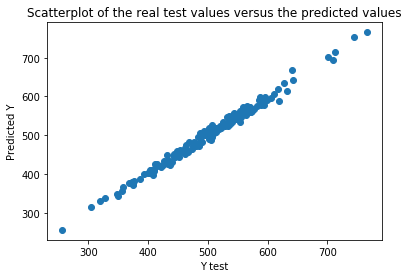

In [249]:
plt.scatter(y_test, predictions)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')
plt.title('Scatterplot of the real test values versus the predicted values');

### Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

In [250]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430815
MSE: 79.81305165097429
RMSE: 8.933815066978624


### Residuals
This is a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

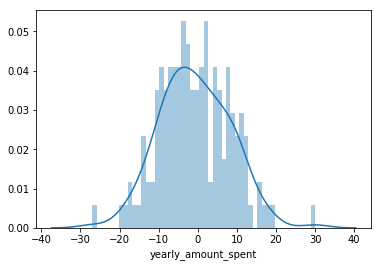

In [251]:
sns.distplot((y_test-predictions), bins=50);

### Multicollinearity

Computing VIF (Variance Inflation Factor). VIF of greater than 10 for any variable indicates that we have multi-collinearity among independent variables.

In [252]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y,X = dmatrices('yearly_amount_spent ~ avg_session_length + time_on_app + time_on_website + length_of_membership', df, return_type='dataframe')
vif=pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns

vif

,VIF Factor,features
0,2657.483692,Intercept
1,1.005422,avg_session_length
2,1.008684,time_on_app
3,1.010275,time_on_website
4,1.006949,length_of_membership


- There is no issue of multicollinearity in this dataset

In [253]:
X=df[['avg_session_length', 'time_on_app', 'time_on_website', 'length_of_membership']]
coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['Coefficient']
coefficients

,Coefficient
avg_session_length,25.981550
time_on_app,38.590159
time_on_website,0.190405
length_of_membership,61.279097


** How can you interpret these coefficients? **

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

### Should the company focus more on their mobile app or on their website?

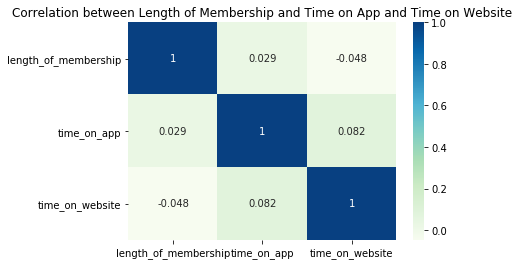

In [254]:
sns.heatmap(df[['length_of_membership','time_on_app', 'time_on_website']].corr(), cmap='GnBu', annot=True)
plt.title('Correlation between Length of Membership and Time on App and Time on Website');

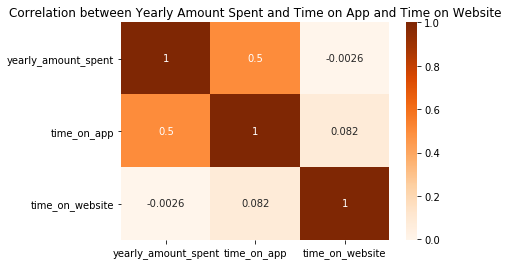

In [255]:
sns.heatmap(df[['yearly_amount_spent','time_on_app', 'time_on_website']].corr(), cmap='Oranges', annot=True)
plt.title('Correlation between Yearly Amount Spent and Time on App and Time on Website');

In [256]:
df.corr()

,avg_session_length,time_on_app,time_on_website,length_of_membership,yearly_amount_spent
avg_session_length,1.000000,-0.027826,-0.034987,0.060247,0.355088
time_on_app,-0.027826,1.000000,0.082388,0.029143,0.499328
time_on_website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
length_of_membership,0.060247,0.029143,-0.047582,1.000000,0.809084
yearly_amount_spent,0.355088,0.499328,-0.002641,0.809084,1.000000


**yearly_amount_spent has the highest correlation with length_of_membership, second highest correlation with time_on_app, and lastly with avg_session_length.**

**And between time_on_app and time_on_website, length_of_membership has higher correlation with time_on_app.**

**The company should focus more on developing their app and improving the customer experiences during the sessions which in turn will translate into higher yearly_amount_spent **